In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import os
import math
from pandas.tseries.offsets import DateOffset

In [14]:
# 
state_results = pd.read_csv('data_tables/state_results.csv')
# state_results = dataframes['state_results']
state_results['Release Period'] = pd.to_datetime(state_results['Release Period'].str.lstrip('07_'))
state_results.columns = state_results.columns.str.lower().str.replace(' ', '_')
state_results['nps'] = state_results['top-box_percentage'] - state_results['bottom-box_percentage']
state_results.head()

,release_period,state,measure_id,bottom-box_percentage,middle-box_percentage,top-box_percentage,nps
0,2015-01-01,AK,H_CLEAN_HSP,8,22,70,62
1,2015-01-01,AK,H_COMP_1,9,17,74,65
2,2015-01-01,AK,H_COMP_2,10,15,75,65
3,2015-01-01,AK,H_COMP_3,11,21,68,57
4,2015-01-01,AK,H_COMP_5,19,17,64,45


C:\Users\Andy\AppData\Local\Temp\ipykernel_23412\3414321854.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


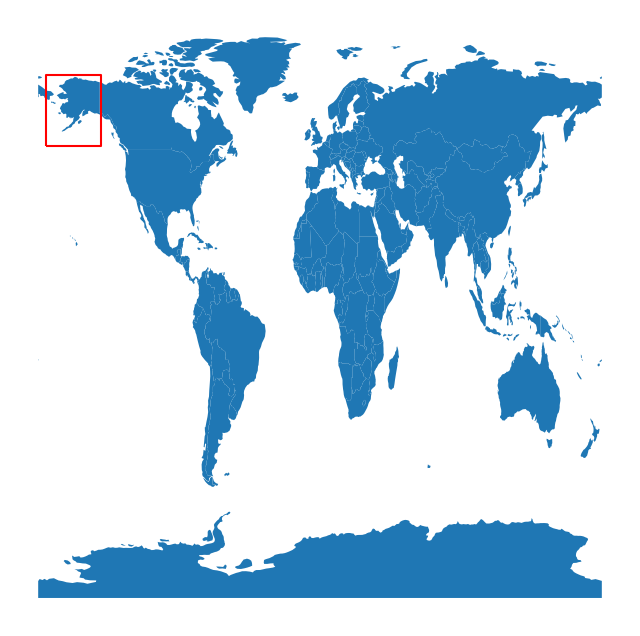

In [16]:
gdf = gpd.read_file('shapefiles\cb_2022_us_state_20m.shp')
df = pd.read_csv('data_tables\state_results.csv')
gdf = gdf.merge(state_results,left_on='STUSPS',right_on='state')


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
polygon = Polygon([(-175,50),(-175,72),(-140, 72),(-140,50)])
hipolygon = Polygon([(-180,0),(-180,90),(-120,90),(-120,0)])

# polygon=hipolygon
poly_gdf = gpd.GeoDataFrame( geometry=[polygon], crs=world.crs)

fig, ax1 = plt.subplots(1, figsize=(8, 18))
world.plot(ax=ax1)
poly_gdf.boundary.plot(ax = ax1, color="red")
ax1.set_axis_off()
plt.show()

<Axes: >

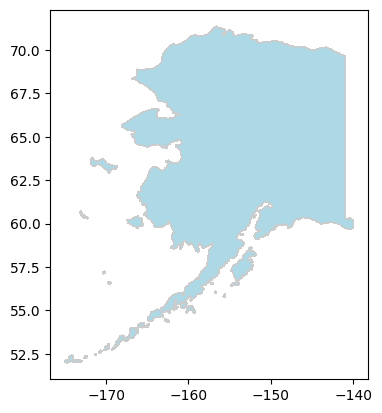

In [18]:
alaska_gdf = gdf[gdf.state=='AK']

alaska_gdf.clip(polygon).plot( color='lightblue', linewidth=0.8, edgecolor='0.8')


<Axes: >

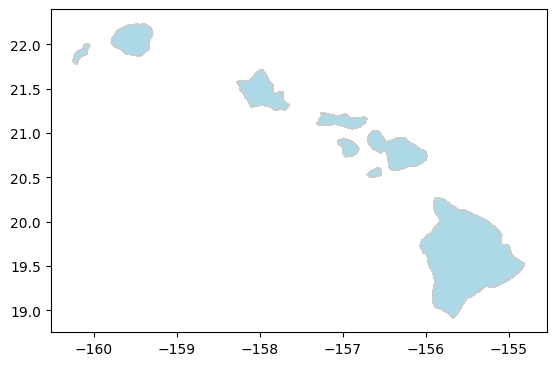

In [19]:
hawaii_gdf = gdf[gdf.state =='HI']
hipolygon = Polygon([(-161,0),(-161,90),(-120,90),(-120,0)])
hawaii_gdf.clip(hipolygon).plot(color='lightblue', linewidth=0.8, edgecolor='0.8')

In [ ]:
usmap

In [ ]:
usmap[~usmap.state.isin(['HI','AK'])]

In [49]:
usmap.nps.describe()

count    4580.000000
mean       62.937773
std        12.052184
min        24.000000
25%        53.000000
50%        65.000000
75%        73.000000
max        85.000000
Name: nps, dtype: float64

<Axes: >

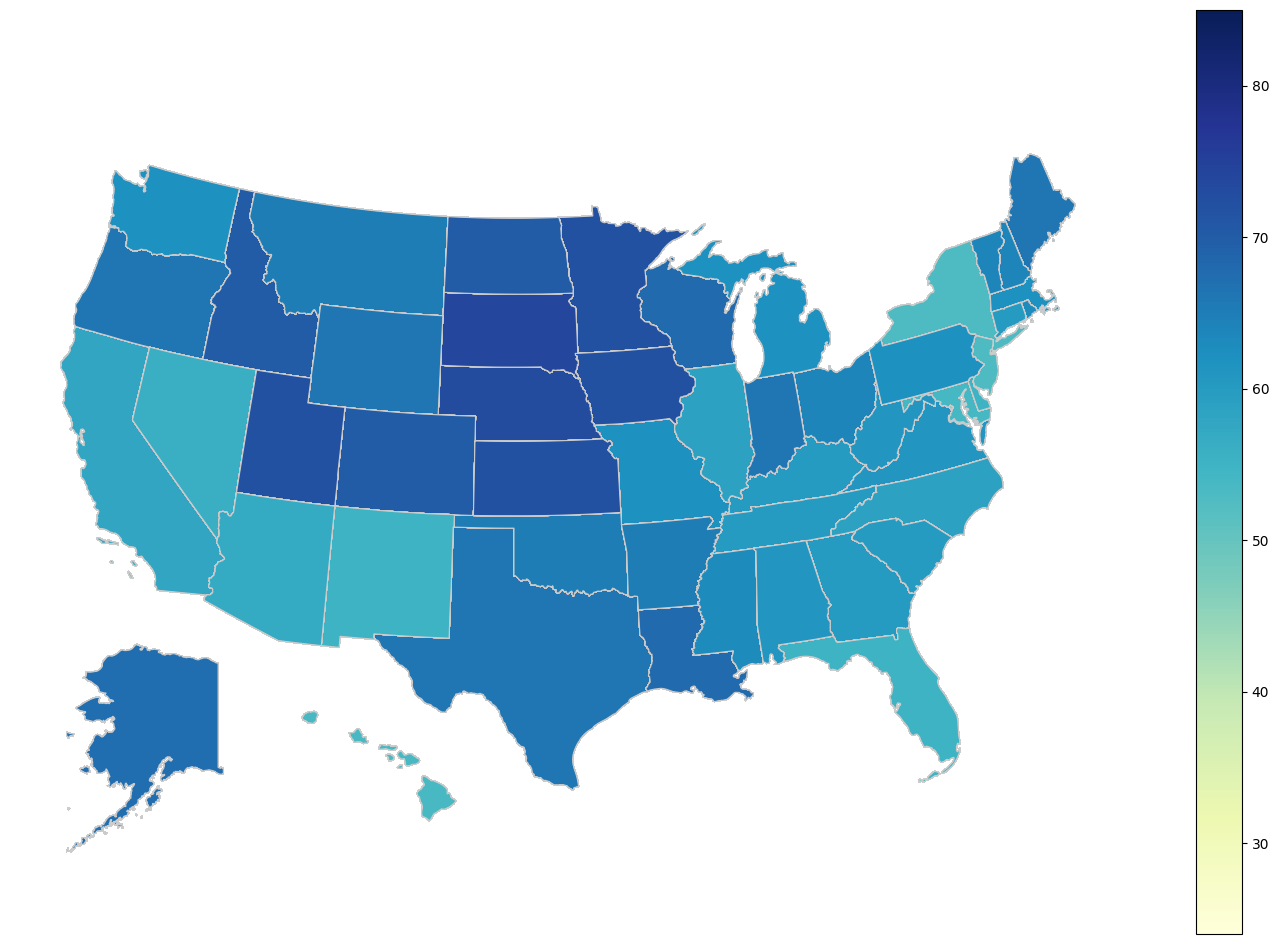

In [48]:
colorpal = 'YlGnBu'

#Create US map without Alaska and Hawaii
usmap = gdf.to_crs(2163)
fig, ax = plt.subplots(1, figsize=(18, 12))
ax.axis('off')
usmap[~usmap.state.isin(['HI','AK'])].plot(column='nps', cmap=colorpal, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add Alaska to map
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = gdf[gdf.state =='AK']
alaska_gdf.clip(polygon).plot(column='nps', cmap=colorpal, linewidth=0.8, ax=akax, edgecolor='0.8')

# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hiax.axis('off')
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf.state =='HI']
hawaii_gdf.clip(hipolygon).plot(column='nps', cmap=colorpal, linewidth=0.8,ax=hiax, edgecolor='0.8')


c:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


AttributeError: 'GeoDataFrame' object has no attribute 'value_determined_color'

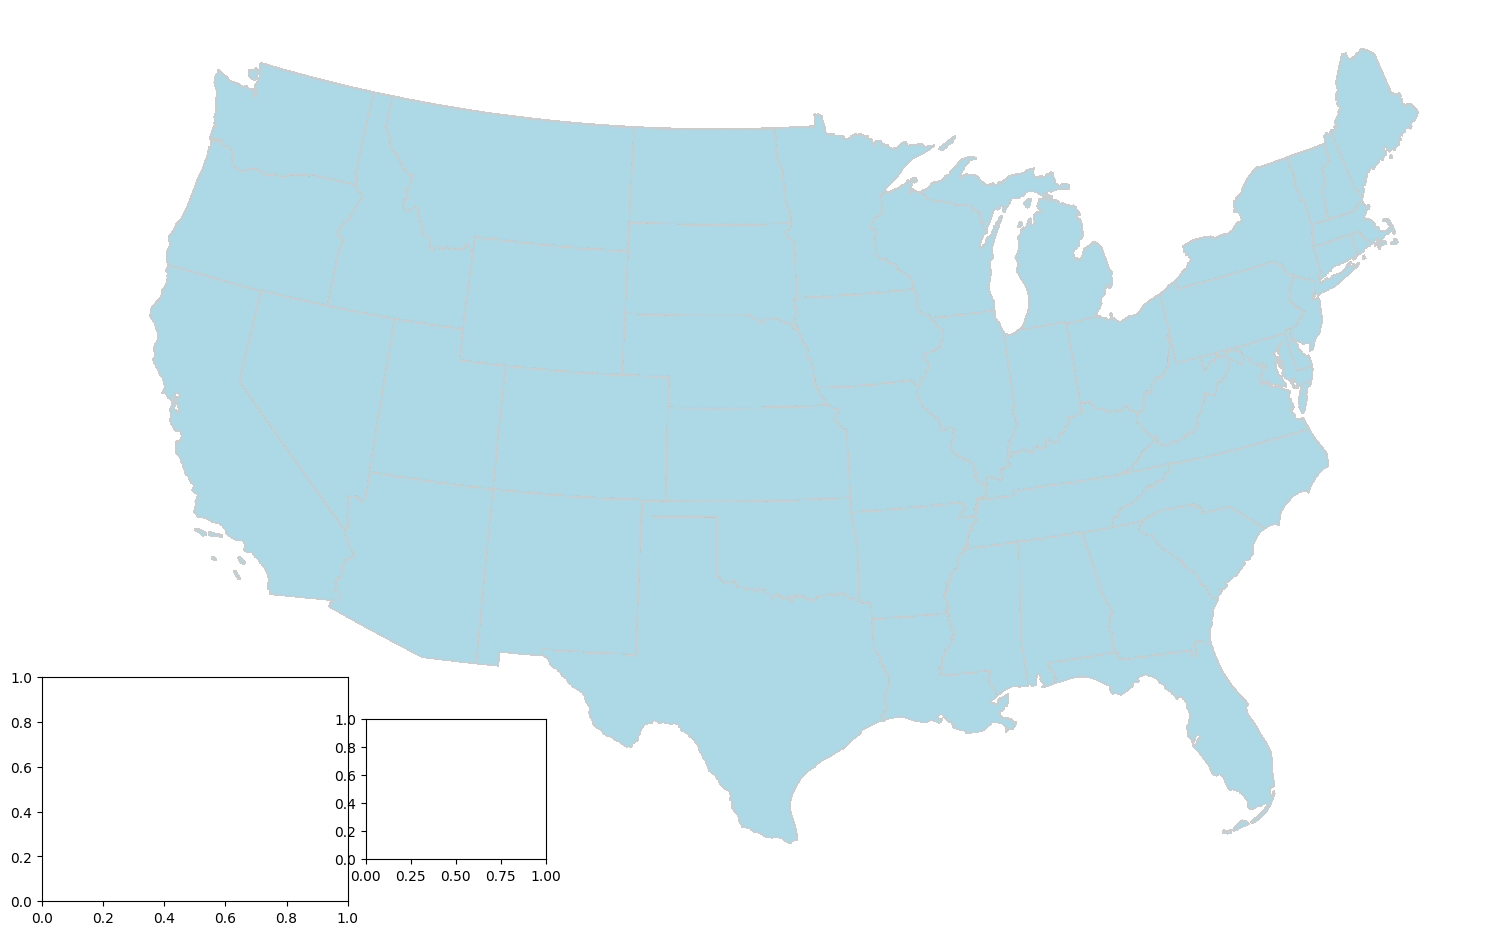

In [8]:
# Create a "copy" of gdf for re-projecting
usmap = gdf.to_crs({'init':'epsg:2163'})

# create figure and axes for with Matplotlib for main map
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box from the main map
ax.axis('off')


# create map of all states except AK and HI in the main map axis
usmap[~usmap['State'].isin(['HI','AK'])].plot(color='lightblue', linewidth=0.8, ax=ax, edgecolor='0.8')


# Add Alaska Axis (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.17, 0.16])   

# Add Hawaii Axis(x, y, width, height)
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   

akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip western islands
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = gdf[gdf['State']=='AK']
alaska_gdf.clip(polygon).plot(color=gdf[gdf['State']=='AK'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='0.8')


# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hiax.axis('off')
# polygon to clip western islands
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf['State']=='HI']
hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='0.8')


In [ ]:
# Pivot table to show NPS by year
df_nps = state_results.pivot_table(index=['measure_id', 'state'], 
                                   columns=state_results['release_period'].dt.year, 
                                   values='nps').rename_axis(None, axis=1).sort_values(by=['state', 'measure_id'], ascending=True).reset_index()

# df_nps = p_table.sort_values(by=['state', 'measure_id'], ascending=True)
df_nps

In [19]:
import pandas as pd

# Create the dataframe based on the provided table
data = {
    'id': [1, 2, 3, 4, 5, 6],
    'score': [3.50, 3.65, 4.00, 3.85, 4.00, 3.65]
}
df = pd.DataFrame(data)
df


,id,score
0,1,3.50
1,2,3.65
2,3,4.00
3,4,3.85
4,5,4.00
5,6,3.65


In [1]:
import pandas as pd

# Creating the dataframe
data = {
    'bill_id': [6, 8, 4, 11, 13],
    'customer_id': [1, 1, 2, 3, 3],
    'amount': [549, 834, 394, 657, 257]
}

store = pd.DataFrame(data)
store


,bill_id,customer_id,amount
0,6,1,549
1,8,1,834
2,4,2,394
3,11,3,657
4,13,3,257


In [5]:
x = store[store.amount >500]
pd.DataFrame({'rich_count': [x.customer_id.nunique()]})

,rich_count
0,2


In [25]:
person.sort_values(by=['id']).drop_duplicates(subset=['email'], keep='first')

,id,email
0,1,john@example.com
1,2,bob@example.com


In [31]:
import pandas as pd

# Data
data = {
    'student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'class': ['Math', 'English', 'Math', 'Biology', 'Math', 'Computer', 'Math', 'Math', 'Math']
}

# Create dataframe
df = pd.DataFrame(data)

# Display dataframe
print(df)


  student     class
0       A      Math
1       B   English
2       C      Math
3       D   Biology
4       E      Math
5       F  Computer
6       G      Math
7       H      Math
8       I      Math


In [36]:
classcount = df.groupby('class')[['student']].count().sort_values(by='student', ascending=False).reset_index().head(1)
classcount


,class,student
0,Math,6
